In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix

# if you have recent matplotlib versions it spamms deprecation warnings
# these two lines remove the problem
import warnings
warnings.filterwarnings("ignore", module = "matplotlib\..*" )

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math
#!pip list

2023-07-08 17:00:22.138913: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data='/Users/alessandrobreccia/Desktop/1_ANNO_MAGISTR/2_semester/LabCompB/Project/Plethysmography/data'

# importing
data_1 = pd.read_csv(data+'/1.csv', sep=',')
data_2 = pd.read_csv(data+'/2.csv', sep=',')
data_3 = pd.read_csv(data+'/3.csv', sep=',')
data_4 = pd.read_csv(data+'/4.csv', sep=',')
data_5 = pd.read_csv(data+'/5.csv', sep=',')
data_6 = pd.read_csv(data+'/6.csv', sep=',')
data_7 = pd.read_csv(data+'/7.csv', sep=',')
data_8 = pd.read_csv(data+'/8.csv', sep=',')
data_9 = pd.read_csv(data+'/9.csv', sep=',')
data_10 = pd.read_csv(data+'/10.csv', sep=',')
data_11 = pd.read_csv(data+'/11.csv', sep=',')
data_12 = pd.read_csv(data+'/12.csv', sep=',')
data_13 = pd.read_csv(data+'/13.csv', sep=',')
data_14 = pd.read_csv(data+'/14.csv', sep=',')
data_15 = pd.read_csv(data+'/15.csv', sep=',')
data_16 = pd.read_csv(data+'/16.csv', sep=',')
data_17 = pd.read_csv(data+'/17.csv', sep=',')
data_18 = pd.read_csv(data+'/18.csv', sep=',')
data_19 = pd.read_csv(data+'/19.csv', sep=',')
data_20 = pd.read_csv(data+'/20.csv', sep=',')


# Normalization of the data
data_1[['plety','ECG']] -= data_1[['plety','ECG']].mean() 
data_1[['plety','ECG']] /= data_1[['plety','ECG']].std()
data_2[['plety','ECG']] -= data_2[['plety','ECG']].mean() 
data_2[['plety','ECG']] /= data_2[['plety','ECG']].std()
data_3[['plety','ECG']] -= data_3[['plety','ECG']].mean() 
data_3[['plety','ECG']] /= data_3[['plety','ECG']].std()
data_4[['plety','ECG']] -= data_4[['plety','ECG']].mean() 
data_4[['plety','ECG']] /= data_4[['plety','ECG']].std()
data_5[['plety','ECG']] -= data_5[['plety','ECG']].mean() 
data_5[['plety','ECG']] /= data_5[['plety','ECG']].std()
data_6[['plety','ECG']] -= data_6[['plety','ECG']].mean() 
data_6[['plety','ECG']] /= data_6[['plety','ECG']].std()
data_7[['plety','ECG']] -= data_7[['plety','ECG']].mean() 
data_7[['plety','ECG']] /= data_7[['plety','ECG']].std()
data_8[['plety','ECG']] -= data_8[['plety','ECG']].mean() 
data_8[['plety','ECG']] /= data_8[['plety','ECG']].std()
data_9[['plety','ECG']] -= data_9[['plety','ECG']].mean() 
data_9[['plety','ECG']] /= data_9[['plety','ECG']].std()
data_10[['plety','ECG']] -= data_10[['plety','ECG']].mean() 
data_10[['plety','ECG']] /= data_10[['plety','ECG']].std()
data_11[['plety','ECG']] -= data_11[['plety','ECG']].mean() 
data_11[['plety','ECG']] /= data_11[['plety','ECG']].std()
data_12[['plety','ECG']] -= data_12[['plety','ECG']].mean() 
data_12[['plety','ECG']] /= data_12[['plety','ECG']].std()
data_13[['plety','ECG']] -= data_13[['plety','ECG']].mean() 
data_13[['plety','ECG']] /= data_13[['plety','ECG']].std()
data_14[['plety','ECG']] -= data_14[['plety','ECG']].mean() 
data_14[['plety','ECG']] /= data_14[['plety','ECG']].std()
data_15[['plety','ECG']] -= data_15[['plety','ECG']].mean() 
data_15[['plety','ECG']] /= data_15[['plety','ECG']].std()
data_16[['plety','ECG']] -= data_16[['plety','ECG']].mean() 
data_16[['plety','ECG']] /= data_16[['plety','ECG']].std()
data_17[['plety','ECG']] -= data_17[['plety','ECG']].mean() 
data_17[['plety','ECG']] /= data_17[['plety','ECG']].std()
data_18[['plety','ECG']] -= data_18[['plety','ECG']].mean() 
data_18[['plety','ECG']] /= data_18[['plety','ECG']].std()
data_19[['plety','ECG']] -= data_19[['plety','ECG']].mean() 
data_19[['plety','ECG']] /= data_19[['plety','ECG']].std()
data_20[['plety','ECG']] -= data_20[['plety','ECG']].mean() 
data_20[['plety','ECG']] /= data_20[['plety','ECG']].std()

list_data=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20]

# import labeled peaks A
peaks_path = '/Users/alessandrobreccia/Desktop/1_ANNO_MAGISTR/2_semester/LabCompB/Project/Plethysmography/peaksfolder'
peak_a_1 = pd.read_csv( peaks_path+'/a_peak_1.txt' , sep="," , dtype=int)
peak_a_2 = pd.read_csv( peaks_path+'/a_peak_2.txt' , sep="," , dtype=int)
peak_a_3 = pd.read_csv( peaks_path+'/a_peak_3.txt' , sep="," , dtype=int)
peak_a_4 = pd.read_csv( peaks_path+'/a_peak_4.txt' , sep="," , dtype=int)
peak_a_5 = pd.read_csv( peaks_path+'/a_peak_5.txt' , sep="," , dtype=int)
peak_a_6 = pd.read_csv( peaks_path+'/a_peak_6.txt' , sep="," , dtype=int)
peak_a_7 = pd.read_csv( peaks_path+'/a_peak_7.txt' , sep="," , dtype=int)

peak_a_list = [peak_a_1,peak_a_2,peak_a_3,peak_a_4,peak_a_5,peak_a_6,peak_a_7]


for i in range(7):
    p= list(map(int,peak_a_list[i]))
    d= list_data[i]['plety']
    t = np.zeros(len(d))
    t[p] = 1
    peak_a_list[i] = t

peak_a_1 = peak_a_list[0]
peak_a_2 = peak_a_list[1]
peak_a_3 = peak_a_list[2]
peak_a_4 = peak_a_list[3]
peak_a_5 = peak_a_list[4]
peak_a_6 = peak_a_list[5]
peak_a_7 = peak_a_list[6]

# import labeled peaks X'
peak_x_1 = pd.read_csv( peaks_path+'/x_prime_peak_1.txt' , sep="," , dtype=int)
peak_x_2 = pd.read_csv( peaks_path+'/x_prime_peak_2.txt' , sep="," , dtype=int)
peak_x_3 = pd.read_csv( peaks_path+'/x_prime_peak_3.txt' , sep="," , dtype=int)
peak_x_4 = pd.read_csv( peaks_path+'/x_prime_peak_4.txt' , sep="," , dtype=int)
peak_x_5 = pd.read_csv( peaks_path+'/x_prime_peak_5.txt' , sep="," , dtype=int)
peak_x_6 = pd.read_csv( peaks_path+'/x_prime_peak_6.txt' , sep="," , dtype=int)
peak_x_7 = pd.read_csv( peaks_path+'/x_prime_peak_7.txt' , sep="," , dtype=int)

peak_x_list = [peak_x_1,peak_x_2,peak_x_3,peak_x_4,peak_x_5,peak_x_6,peak_x_7]

for i in range(7):
    p= list(map(int,peak_x_list[i]))
    d= list_data[i]['plety']
    t = np.zeros(len(d))
    t[p] = 1
    peak_x_list[i] = t

peak_x_1 = peak_x_list[0]
peak_x_2 = peak_x_list[1]
peak_x_3 = peak_x_list[2]
peak_x_4 = peak_x_list[3]
peak_x_5 = peak_x_list[4]
peak_x_6 = peak_x_list[5]
peak_x_7 = peak_x_list[6]

peak_x = np.concatenate((peak_x_1,peak_x_2,peak_x_3,peak_x_4,peak_x_5,peak_x_6,peak_x_7), axis = None)

peak_a = np.concatenate((peak_a_1,peak_a_2,peak_a_3,peak_a_4,peak_a_5,peak_a_6,peak_a_7), axis = None)
datatrain = np.concatenate((data_1,data_2,data_3,data_4,data_5,data_6,data_7), axis = 0)
datatest = np.concatenate((data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20), axis = 0)

In [24]:
from keras.utils import to_categorical

# Labels
data = np.column_stack(( datatrain, 2*peak_x + peak_a ))

# Switch to categorical representation of the labels
new_labels = to_categorical(data[:,4])

sequence_length = 15

# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
   # if sum(data[i:i+sequence_length, 4]) == 1: 
        X.append(data[i:i+sequence_length, [1]])
        y.append(new_labels[i:i+sequence_length].flatten())
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.85)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

permutation_train = np.random.permutation(X_train.shape[0])
X_train= X_train[permutation_train]
y_train = y_train[permutation_train]

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')
print(f'Testing shape: {y_test.shape}')

Training shape: (21145, 15, 1)
Testing shape: (3732, 15, 1)
Testing shape: (3732, 45)


In [327]:

input_shape = (X_train.shape[1], X_train.shape[2])

fc_size = sequence_length

input_data = keras.layers.Input(shape=input_shape, name='input0')

conv1 = keras.layers.Conv1D( 32, 8 , activation='tanh', input_shape=input_shape[1:])(input_data)

#pool1 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool1')(conv1)

conv2 = keras.layers.Conv1D( 16 , 4, activation='tanh' )(conv1)

conv3 = keras.layers.Conv1D( 8 , 2, activation='tanh')(conv2)

#pool2 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool2')(conv3)

flat = keras.layers.Flatten()(conv3)

fc0 = keras.layers.Dense(256, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

#fc1 = keras.layers.Dense(sequence_length*3*2, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc1')(fc0)

drop2 = keras.layers.Dropout(0.2)

output1 = keras.layers.Dense(sequence_length*3, activation=tf.nn.sigmoid, 
                            kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output1', )(fc0)

model = keras.models.Model(inputs=[input_data], outputs=[output1])

model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input0 (InputLayer)         [(None, 15, 1)]           0         
                                                                 
 conv1d_131 (Conv1D)         (None, 8, 32)             288       
                                                                 
 conv1d_132 (Conv1D)         (None, 5, 16)             2064      
                                                                 
 conv1d_133 (Conv1D)         (None, 4, 8)              264       
                                                                 
 flatten_29 (Flatten)        (None, 32)                0         
                                                                 
 fc0 (Dense)                 (None, 256)               8448      
                                                                 
 output1 (Dense)             (None, 45)                115

In [328]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rms = keras.optimizers.RMSprop(learning_rate=0.001 )
es = keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', verbose=1, patience=10, start_from_epoch=50 )

model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              weighted_metrics = ['Precision','FalseNegatives','TruePositives'])

history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 32, callbacks=[es])
            

Epoch 1/100


529/529 [==============================] - 35s 33ms/step - loss: 43.1102 - precision: 0.9631 - false_negatives: 8443.0000 - true_positives: 245297.0000 - val_loss: 42.6772 - val_precision: 0.9678 - val_false_negatives: 2040.0000 - val_true_positives: 61395.0000
Epoch 2/100
529/529 [==============================] - 33s 63ms/step - loss: 42.4064 - precision: 0.9674 - false_negatives: 8264.0000 - true_positives: 245476.0000 - val_loss: 42.2639 - val_precision: 0.9678 - val_false_negatives: 2040.0000 - val_true_positives: 61395.0000
Epoch 3/100
529/529 [==============================] - 5s 10ms/step - loss: 42.2038 - precision: 0.9674 - false_negatives: 8263.0000 - true_positives: 245477.0000 - val_loss: 42.1384 - val_precision: 0.9678 - val_false_negatives: 2040.0000 - val_true_positives: 61395.0000
Epoch 4/100
529/529 [==============================] - 9s 18ms/step - loss: 42.0970 - precision: 0.9677 - false_negatives: 8293.0000 - true_positives: 245447.0000 - val_loss: 42.1097 - val_pr

In [329]:
p = model.predict(X_test)
pred_y = np.zeros((len(y_test),15))
y_test_2 = np.zeros((len(y_test),15))

for i in range(len(p)):
    a = np.argmax(np.reshape(p[i], (15,3)) , axis=1) 
    # mapping 0 in 0, 1 in 1, 2 in -1
    pred_y[i] = a*5/2 -3/2*a*a
    y_test_2[i] = np.argmax(np.reshape(y_test[i], (15,3)) , axis=1) 

print(len(pred_y))

117/117 [==============================] - 2s 12ms/step
3732


In [330]:
for i in range(len(pred_y)-sequence_length+1):
        if i==0:
                pred_y_plot = np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )
        else:
                pred_y_plot = np.row_stack( (pred_y_plot, np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )))      

df = pd.DataFrame(pred_y_plot,  columns=['pred','ind'])
df = df.groupby('ind').mean('pred')  

In [331]:
for i in range(len(X_test)-sequence_length+1):
        if i==0:
                xtest_y_plot = np.column_stack( (X_test[i,:,0] , np.arange(i,i+sequence_length,1), y_test_2[i]) )
        else:
                xtest_y_plot = np.row_stack( (xtest_y_plot, np.column_stack( (X_test[i,:,0], np.arange(i,i+sequence_length,1), y_test_2[i]) )))      

df_x = pd.DataFrame(xtest_y_plot,  columns=['x_test','ind', 'y_test'])
df_x = df_x.groupby('ind').mean('x_test', 'y_test')  

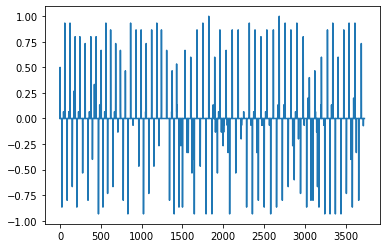

In [332]:
plt.plot(df['pred'])

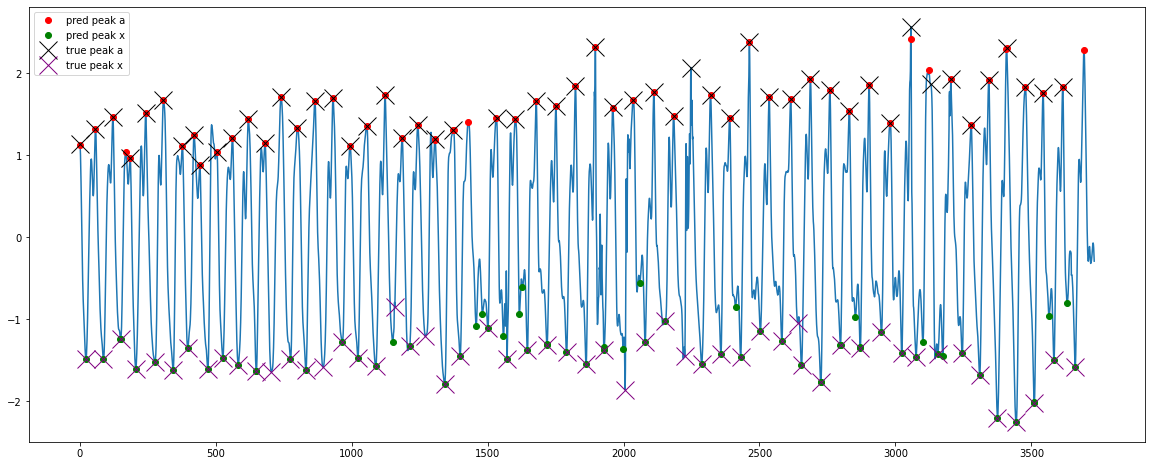

In [333]:
threshold = 0.2

fig = plt.figure(figsize=(20,8))
plt.plot(df_x['x_test'])
plt.plot(np.where(df['pred']>threshold)[0],  df_x['x_test'][df['pred']>threshold], 'o', color = 'red' , label = 'pred peak a')
plt.plot(np.where(df['pred']<-1*threshold)[0],  df_x['x_test'][df['pred']<-1*threshold], 'o', color = 'green' , label = 'pred peak x')
plt.plot(np.where(df_x['y_test']==1)[0],  df_x['x_test'][df_x['y_test']==1], 'x', color = 'black', markersize=18 , label = 'true peak a')
plt.plot(np.where(df_x['y_test']==2)[0],  df_x['x_test'][df_x['y_test']==2], 'x', color = 'purple', markersize=18 , label = 'true peak x')
plt.legend()

In [334]:
print("Actual A peaks:", len(np.where(df_x['y_test']==1)[0]))
print("Predicted label:", len(np.where(df['pred']>threshold)[0]))

print("Actual X peaks:", len(np.where(df_x['y_test']==2)[0]))
print("Predicted label:", len(np.where(df['pred']<-1*threshold)[0]))

lab_0_pos = np.where(df_x['y_test']==0)[0]
pred_0_pos = np.where(np.logical_and( df['pred']>-1*threshold, df['pred']<threshold) )[0]

lab_a_pos = np.where(df_x['y_test']==1)[0]
pred_a_pos = np.where(df['pred']>threshold)[0]

lab_x_pos = np.where(df_x['y_test']==2)[0]
pred_x_pos = np.where(df['pred']<-1*threshold)[0]

print("Actual vs Predicted A peaks")
print(lab_a_pos)
print(pred_a_pos)

print("Actual vs Predicted X peaks")
print(lab_x_pos)
print(pred_x_pos)

true_posi_a = len(np.intersect1d(lab_a_pos, pred_a_pos))
true_posi_x = len(np.intersect1d(lab_x_pos, pred_x_pos))
true_posi_0 = len(np.intersect1d(lab_0_pos, pred_0_pos))

pred_a_lab_0 = len(np.intersect1d(lab_0_pos, pred_a_pos))
pred_x_lab_0 = len(np.intersect1d(lab_0_pos, pred_x_pos))
pred_0_lab_a = len(np.intersect1d(lab_a_pos, pred_0_pos))
pred_x_lab_a = len(np.intersect1d(lab_a_pos, pred_x_pos))
pred_0_lab_x = len(np.intersect1d(lab_x_pos, pred_0_pos))
pred_a_lab_x = len(np.intersect1d(lab_x_pos, pred_a_pos))

for z in lab_a_pos:
    if z not in pred_a_pos:
        if z+1 in pred_a_pos or z-1 in pred_a_pos:
            true_posi_a += 1
            if z in pred_0_pos:
                pred_0_lab_a -=1
                pred_a_lab_0 -=1
            elif z in pred_x_pos:
                pred_x_lab_a -=1
                pred_a_lab_x -=1
            

for z in lab_x_pos:
    if z not in pred_x_pos:
        if z+1 in pred_x_pos or z-1 in pred_x_pos:
            true_posi_x += 1
            if z in lab_0_pos:
                pred_0_lab_x -=1
                pred_x_lab_0 -=1
            else:
                pred_a_lab_x -=1
                pred_x_lab_a -=1


print("The A-A score is", round(true_posi_a/len(lab_a_pos),4))
print("The X-X score is", round(true_posi_x/len(lab_x_pos),4))
print("The 0-0 score is", round(true_posi_0/len(lab_0_pos),4))

Actual A peaks: 54
Predicted label: 59
Actual X peaks: 55
Predicted label: 70
Actual vs Predicted A peaks
[   0   58  122  185  243  308  378  421  442  504  562  620  682  740
  801  865  932  994 1056 1123 1186 1244 1307 1374 1533 1602 1679 1751
 1823 1896 1961 2036 2111 2184 2248 2320 2391 2463 2535 2615 2687 2759
 2830 2903 2981 3057 3129 3204 3279 3343 3409 3478 3543 3615]
[   1   58  122  169  185  243  308  378  421  442  504  562  620  682
  740  801  865  932  994 1056 1123 1186 1243 1306 1307 1374 1375 1429
 1532 1602 1679 1751 1823 1896 1960 2036 2111 2184 2320 2390 2463 2535
 2615 2687 2759 2830 2903 2981 3056 3123 3204 3278 3343 3408 3409 3478
 3543 3615 3693]
Actual vs Predicted X peaks
[  23   87  151  206  277  343  398  471  526  583  650  705  775  832
  895  966 1023 1089 1159 1213 1271 1342 1399 1501 1572 1646 1719 1791
 1862 1928 2006 2079 2154 2225 2287 2358 2431 2503 2582 2641 2655 2726
 2798 2871 2948 3023 3076 3156 3245 3310 3375 3444 3511 3583 3661]
[  23   87

0.9950317416505658
0.9259259259259259
1.0


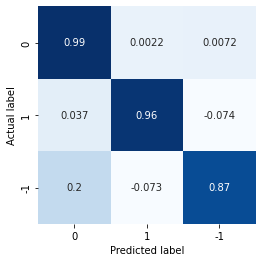

In [335]:
import seaborn as sns

normalize = True



mat = np.array(confusion_matrix(df_x['y_test'], df['pred']>threshold), dtype=float)

if normalize:
    mat[0,0] = true_posi_0/len(lab_0_pos)
    mat[0,1] = pred_a_lab_0/len(lab_0_pos)
    mat[0,2] = pred_x_lab_0/len(lab_0_pos)
    mat[1,0] = pred_0_lab_a/len(lab_a_pos)
    mat[1,1] = true_posi_a/len(lab_a_pos)
    mat[1,2] = pred_x_lab_a/len(lab_a_pos)
    mat[2,0] = pred_0_lab_x/len(lab_x_pos)
    mat[2,1] = pred_a_lab_x/len(lab_x_pos)
    mat[2,2] = true_posi_x/len(lab_x_pos)
    

    #mat[0,1] = mat[0,1]/len(df_x['y_test'][df_x['y_test'] == 0])
    #mat[1,0] = 1-true_posi_a/len(lab_a_pos)
    
print( mat[0,0]+ mat[0,1]+ mat[0,2])
print( mat[1,0]+ mat[1,1]+ mat[1,2])
print( mat[2,0]+ mat[2,1]+ mat[2,2])

labels = ['0', '1','-1']
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()